In [32]:
import math
import matplotlib.pyplot as plt

class Gaussian():
    """Gaussian distribution class for calculating and visualizing a Gaussian/Normal distribution.
    
    Attributes: 
    1. mean (float): representing the mean value of the distribution
    2. stdev (float): representing the standard deviation of the distribution
    3. data_list (list of floats): a list of floats extracted from the data file
    
    """
    
    def __init__(self, mu = 0, sigma = 1):
        self.mean = mu
        self.stdev = sigma
        self.data = []
    
    def calculate_mean(self):
        """Method for calcualating the mean of the data set
        
        Args: None
        
        Returns: float, mean of the data set
        
        """
        
        avg = 1.0*sum(self.data)/len(self.data)
        
        self.mean = avg
        return self.mean
    
    def calculate_stdev(self, sample=True):
        """ Method for calculating the standard deviation of the data set.
        
            Args: sample(bool); whether the data set represents a sample or population.
            
            Return: float, the standard deviation of the data set.        
        
        """
        
        if sample:
            n = len(self.data) - 1
        else:
            n = len(self.data)
        
        mean = self.mean
        sigma = 0
        for d in self.data:
            sigma += (d-mean) **2
            
        sigma = math.sqrt(sigma/n)
        self.stdev = sigma
        return self.stdev
    
    def read_data_file(self, file_name, sample=True):
        """Method for reading data from a text file. The text file should have one float number per line.
        The numbers are stired in the data attribute. 
        The mean and standard deviation are calculated after the numbers have been read.
        
        Args:
            file_name: (string) the name of the file to read from.
            
        returns:
                none.
                   
        """
        
        with open(file_name) as file:
            data_list = []
            line = file.readline()
            while line:
                data_list.append(int(line))
                line = file.readline()
        file.close()
        
        self.data = data_list
        self.mean = self.calculate_mean()
        self.stdev = self.calculate_stdev(sample)
        
    def plot_histogram(self):
        
        """This method plots histogram of the instance variable data using 
        matplotlib pyplot library.
        
        Args: None
        
        Returns: None
        """
        plt.hist(self.data)
        plt.title('Histogram of Data')
        plt.xlabel('data')
        plt.ylabel('count')
        
    def pdf(self, x):
        
        """Method for calculating probability density function for the guassian distribution.
        
        Args: x(float) point for calculating the probability density function.
        
        Returns: Proability density fumction output.
        """
        
        return (1.0/(self.stdev*math.sqrt(2*math.pi))) * math.exp(-5.0*((x - self.mean) / self.stdev)**2)
    
    def plot_histogram_pdf(self, n_spaces = 50):
        
        """Method for plotting the normalized histogram of the data and 
        the plot of the pdf along the same range
        
        Args: n_spaces(int): Number of data points
        
        Returns:
            list: x values for the pdf plot
            list: y values for the pdf plot
        """
        
        mu = self.mean
        sigma = self.stdev
        
        min_range = min(self.data)
        max_range = max(self.data)
        
        #calculates the interval between x vakues
        interval = 1.0 * (max_range - min_range)/n_spaces
        
        x = []
        y = []
        
        #calculates the x values to visualize
        for i in range(n_spaces):
            tmp = min_range + interval*i
            x.append(tmp)
            y.append(self.pdf(tmp))
            
        #make the plots
        fig, axes = plt.subplots(2, sharex=True)
        fig.subplots_adjust(hspace=.5)
        axes[0].hist(self.data, density=True)
        axes[0].set_title('Normed Histogram of Data')
        axes[0].set_ylabel('Density')
        
        
        axes[1].plot(x, y)
        axes[1].set_title('Normal distribution for \n Sample mean and Standard deviation')
        axes[0].set_ylabel('Density')
        plt.show()
        
        return x, y
        
        
            

In [33]:
gaussian_one = Gaussian()
gaussian_one.read_data_file('numbers.txt')

In [34]:
print('The mean is {}'.format(gaussian_one.mean))
print('The standard deviation of the data is {}'.format(gaussian_one.stdev))

The mean is 78.0909090909091
The standard deviation of the data is 92.87459776004906


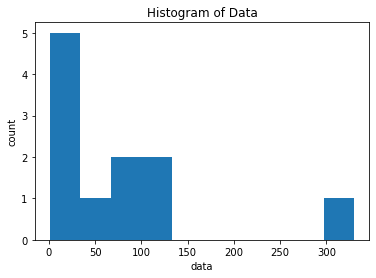

In [35]:
gaussian_one.plot_histogram()

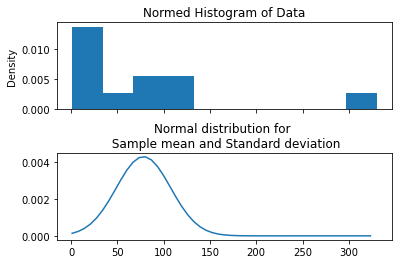

([1.0,
  7.58,
  14.16,
  20.740000000000002,
  27.32,
  33.9,
  40.480000000000004,
  47.06,
  53.64,
  60.22,
  66.8,
  73.38,
  79.96000000000001,
  86.54,
  93.12,
  99.7,
  106.28,
  112.86,
  119.44,
  126.02,
  132.6,
  139.18,
  145.76,
  152.34,
  158.92000000000002,
  165.5,
  172.08,
  178.66,
  185.24,
  191.82,
  198.4,
  204.98,
  211.56,
  218.14000000000001,
  224.72,
  231.3,
  237.88,
  244.46,
  251.04,
  257.62,
  264.2,
  270.78000000000003,
  277.36,
  283.94,
  290.52,
  297.1,
  303.68,
  310.26,
  316.84000000000003,
  323.42],
 [0.00013705408503739095,
  0.0002406531288379744,
  0.0004018757099424001,
  0.0006382527865812373,
  0.0009640385455587616,
  0.0013848310585665854,
  0.0018919075428695895,
  0.0024581237297925133,
  0.0030374440511713183,
  0.0035695506767744562,
  0.003989509779789729,
  0.004240589495330217,
  0.004286804219163588,
  0.004121371683700931,
  0.003768344799885616,
  0.0032768774604501017,
  0.002710007457397377,
  0.00213148110902355

In [36]:
gaussian_one.plot_histogram_pdf()